#Relatório de análise VII

##Criando agrupamentos

In [1]:
import pandas as pd

dados = pd.read_csv('aluguel_residencial3.csv', sep = ';')
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento


In [2]:
dados['Valor'].mean()

5046.172821405663

In [3]:
bairros = ['Barra da Tijuca', 'Copacapana', 'Ipanema', 'Leblon', 'Botafogo', 'Flamengo', 'Tijuca']
selecao = dados['Bairro'].isin(bairros)   #Seleciona apenas os bairros da lista
dados = dados[selecao]

In [4]:
dados['Bairro'].drop_duplicates()  #Elimina os duplicados para ter certeza que deu certo o drop

5     Barra da Tijuca
15             Tijuca
19            Ipanema
23           Botafogo
27             Leblon
78           Flamengo
Name: Bairro, dtype: object

In [5]:
grupo_bairro = dados.groupby('Bairro')
type(grupo_bairro)

pandas.core.groupby.generic.DataFrameGroupBy

In [6]:
grupo_bairro.groups

{'Barra da Tijuca': [5, 14, 16, 21, 30, 32, 35, 42, 43, 60, 61, 64, 68, 74, 79, 93, 107, 110, 112, 117, 130, 132, 136, 150, 153, 155, 165, 166, 173, 186, 189, 207, 214, 221, 224, 233, 236, 239, 244, 259, 265, 274, 276, 291, 292, 293, 295, 302, 308, 311, 325, 335, 336, 345, 360, 366, 368, 374, 380, 387, 389, 400, 412, 432, 433, 435, 436, 439, 449, 451, 462, 463, 465, 473, 476, 484, 494, 500, 503, 511, 537, 538, 539, 540, 543, 547, 552, 554, 555, 556, 584, 587, 588, 590, 594, 596, 601, 611, 622, 630, ...], 'Botafogo': [23, 48, 87, 88, 111, 119, 127, 134, 196, 200, 225, 334, 362, 415, 416, 498, 524, 526, 545, 593, 649, 685, 719, 756, 765, 822, 827, 861, 915, 924, 928, 1006, 1043, 1080, 1091, 1110, 1116, 1127, 1140, 1165, 1201, 1205, 1223, 1250, 1282, 1295, 1304, 1317, 1348, 1383, 1414, 1419, 1455, 1517, 1529, 1579, 1630, 1655, 1670, 1699, 1741, 1742, 1788, 1814, 1823, 1826, 1853, 1922, 1931, 1957, 1972, 1981, 1989, 2029, 2066, 2069, 2081, 2083, 2084, 2088, 2097, 2148, 2149, 2165, 2179, 21

In [7]:
for bairro, data in grupo_bairro:
  print('{} -> {}'.format(bairro, data.Valor.mean()))

Barra da Tijuca -> 7069.552938130986
Botafogo -> 8791.828178694159
Flamengo -> 4113.526610644258
Ipanema -> 9352.001133786847
Leblon -> 8746.344992050874
Tijuca -> 2043.52


In [8]:
grupo_bairro[['Valor', 'Condominio']].mean().round(2)

,Valor,Condominio
Bairro,,
Barra da Tijuca,7069.55,3591.01
Botafogo,8791.83,976.28
Flamengo,4113.53,1102.15
Ipanema,9352.00,2244.44
Leblon,8746.34,2107.18
Tijuca,2043.52,711.69


#Estatísticas descritivas

In [9]:
grupo_bairro['Valor'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Bairro,,,,,,,,
Barra da Tijuca,3863.0,7069.55,11874.15,800.0,2500.0,4500.0,8500.0,600000.0
Botafogo,873.0,8791.83,152202.41,700.0,2200.0,3000.0,4350.0,4500000.0
Flamengo,714.0,4113.53,3839.13,800.0,1900.0,2900.0,4975.0,35000.0
Ipanema,1764.0,9352.00,8219.72,1200.0,4500.0,7000.0,11000.0,90000.0
Leblon,1258.0,8746.34,7004.04,100.0,4500.0,7000.0,10500.0,100000.0
Tijuca,1100.0,2043.52,1664.34,750.0,1500.0,1800.0,2300.0,45000.0


In [10]:
grupo_bairro['Valor'].aggregate(['min', 'max']).rename(columns = {'min': 'Mínimo', 'max': 'Máximo'})

,Mínimo,Máximo
Bairro,,
Barra da Tijuca,800.0,600000.0
Botafogo,700.0,4500000.0
Flamengo,800.0,35000.0
Ipanema,1200.0,90000.0
Leblon,100.0,100000.0
Tijuca,750.0,45000.0


In [11]:
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (20, 10))  #Configurando matplot

Text(0.5, 1.0, 'Valor médio do aluguel')

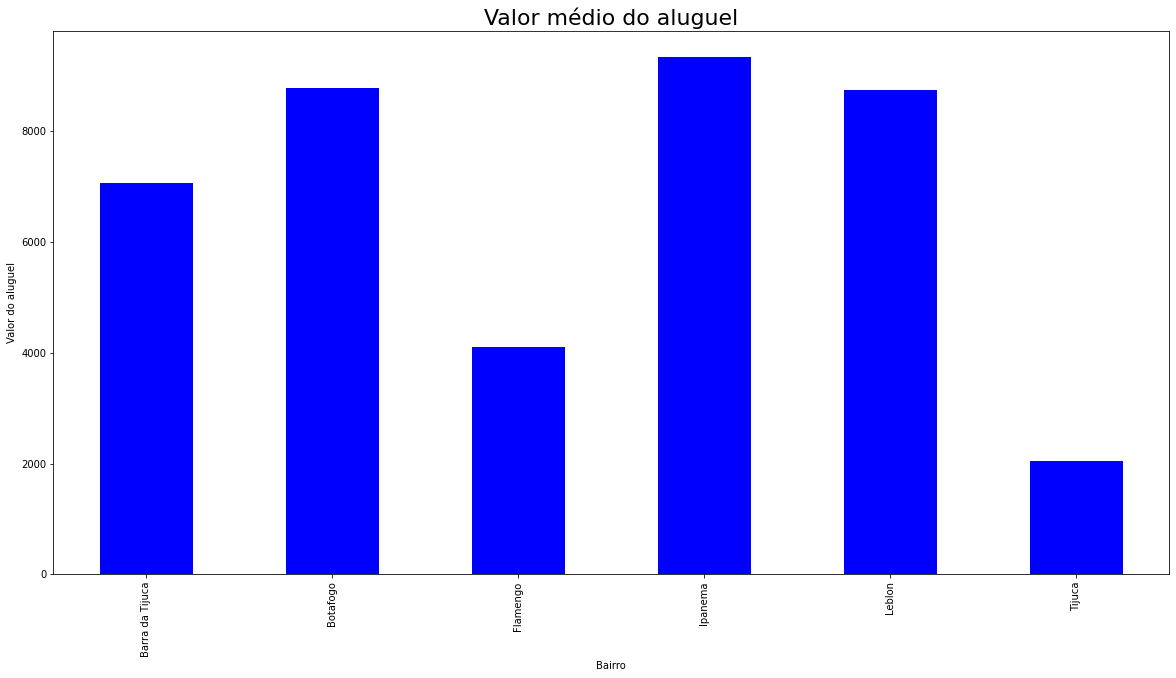

In [12]:
fig = grupo_bairro['Valor'].mean().plot.bar(color = 'blue')  #Plotando
fig.set_ylabel('Valor do aluguel')  #Mudando o nome do eixo y
fig.set_title('Valor médio do aluguel', {'fontsize': 22})  #Mudando o titulo

Text(0.5, 1.0, 'Valor médio do condomio')

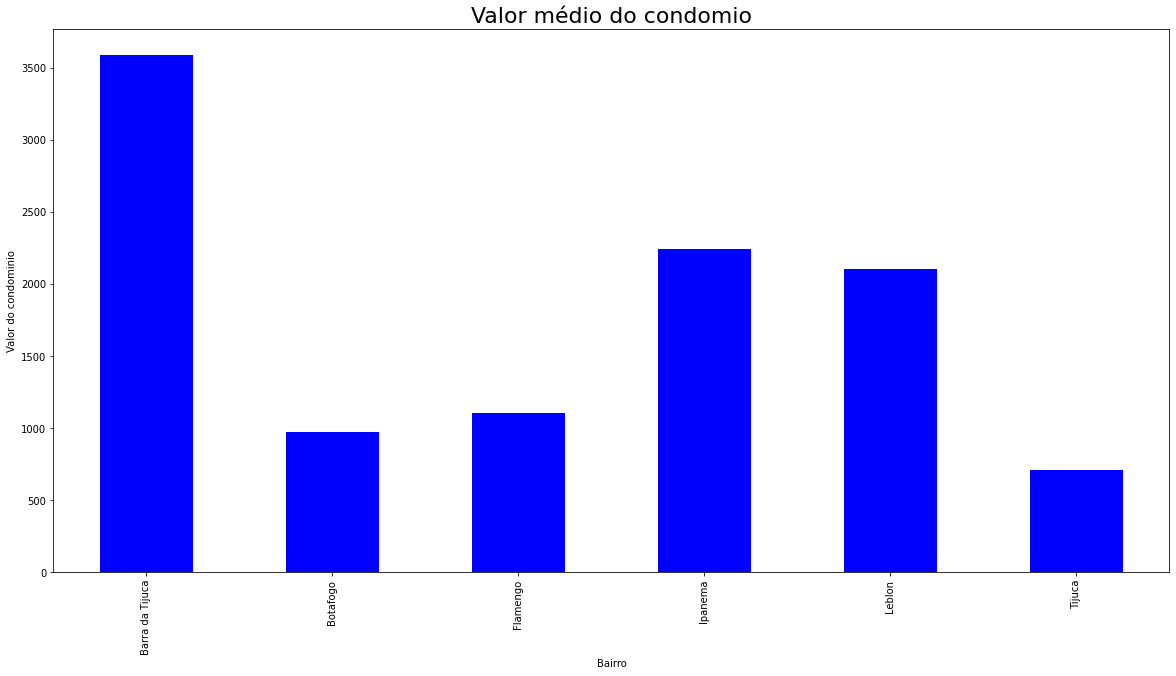

In [13]:
fig = grupo_bairro['Condominio'].mean().plot.bar(color = 'blue')
fig.set_ylabel('Valor do condominio')
fig.set_title('Valor médio do condomio', {'fontsize': 22})

#Criando faixas de valor

In [14]:
dados
#Contar quantos imoveis tem de 1 a 2 quartos, de 3 a 4, de 5 a 6, 7 ou mais
classes = [0, 2, 4, 6, 100]

In [15]:
quartos = pd.cut(dados['Quartos'], classes)
quartos

5        (4, 6]
14       (0, 2]
15       (0, 2]
16       (2, 4]
18       (0, 2]
          ...  
21816    (2, 4]
21817    (2, 4]
21818    (0, 2]
21820    (4, 6]
21825    (0, 2]
Name: Quartos, Length: 9572, dtype: category
Categories (4, interval[int64, right]): [(0, 2] < (2, 4] < (4, 6] < (6, 100]]

In [16]:
pd.value_counts(quartos)

(2, 4]      5042
(0, 2]      4030
(4, 6]       430
(6, 100]      29
Name: Quartos, dtype: int64

In [17]:
labels = ['1 e 2 quartos', '3 e 4 quartos', '5 e 6 quartos', '7 ou mais quartos']

In [18]:
quartos = pd.cut(dados['Quartos'], classes, labels = labels)
pd.value_counts(quartos)

3 e 4 quartos        5042
1 e 2 quartos        4030
5 e 6 quartos         430
7 ou mais quartos      29
Name: Quartos, dtype: int64

In [19]:
quartos = pd.cut(dados['Quartos'], classes, labels = labels, include_lowest = True)
pd.value_counts(quartos)

3 e 4 quartos        5042
1 e 2 quartos        4071
5 e 6 quartos         430
7 ou mais quartos      29
Name: Quartos, dtype: int64